In [14]:
import pandas as pd
import numpy as np

train = pd.read_csv('cleaned_dataset_final.csv')

from sklearn.model_selection import train_test_split

X = train.drop('Persistent',axis=1)
y = train['Persistent']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)


#### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       655
           1       0.60      0.63      0.62       373

    accuracy                           0.71      1028
   macro avg       0.69      0.70      0.69      1028
weighted avg       0.72      0.71      0.72      1028



In [18]:
print(confusion_matrix(y_test,predictions))

[[499 156]
 [138 235]]


In [19]:
from sklearn.metrics import roc_auc_score

y_proba = dtree.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba[:, 1])
print("ROC-AUC score:", roc_auc)


ROC-AUC score: 0.6959294353600883


#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [21]:
rfc_pred = rfc.predict(X_test)

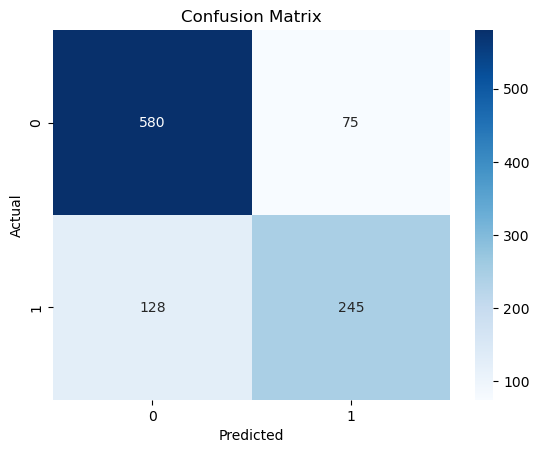

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, rfc_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [27]:
print(classification_report(y_test,rfc_pred))
df = pd.DataFrame.from_dict(classification_report(y_test, rfc_pred, target_names=['Class 0', 'Class 1'], output_dict=True))
styled_df = df.style.set_caption('Classification Report').set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

# Display the styled DataFrame
display(styled_df)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       655
           1       0.77      0.66      0.71       373

    accuracy                           0.80      1028
   macro avg       0.79      0.77      0.78      1028
weighted avg       0.80      0.80      0.80      1028



,Class 0,Class 1,accuracy,macro avg,weighted avg
precision,0.819209,0.765625,0.802529,0.792417,0.799767
recall,0.885496,0.656836,0.802529,0.771166,0.802529
f1-score,0.851064,0.707071,0.802529,0.779067,0.798817
support,655.000000,373.000000,0.802529,1028.000000,1028.000000


In [24]:
from sklearn.metrics import roc_auc_score

y_proba = rfc.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba[:, 1])
print("ROC-AUC score:", roc_auc)


ROC-AUC score: 0.8572641876266296
